This machine learning for predict Earthquakes Intensity of Izmir.

It can predict until 2030

xm is earthquake intensity

md richter mw ms mb earthquake intensity measurer


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('TurkeyEarthquake.csv')

#memory usage and data types
df.info()

#top 10 lines
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24007 entries, 0 to 24006
Data columns (total 17 columns):
id           24007 non-null float64
date         24007 non-null object
time         24007 non-null object
lat          24007 non-null float64
long         24007 non-null float64
country      24007 non-null object
city         11754 non-null object
area         12977 non-null object
direction    10062 non-null object
dist         10062 non-null float64
depth        24007 non-null float64
xm           24007 non-null float64
md           24007 non-null float64
richter      24007 non-null float64
mw           5003 non-null float64
ms           24007 non-null float64
mb           24007 non-null float64
dtypes: float64(11), object(6)
memory usage: 2.6+ MB


,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0
5,2.010000e+13,2005.01.21,12:04:03 AM,37.11,27.75,turkey,mugla,demirciler_milas,south_west,0.1,32.8,3.5,3.5,0.0,NaN,0.0,0.0
6,2.010000e+13,2012.06.24,12:07:22 AM,38.75,43.61,turkey,van,ilikaynak,south_west,0.1,9.4,4.5,0.0,4.5,NaN,0.0,0.0
7,1.990000e+13,1987.12.31,12:49:54 AM,39.43,27.98,turkey,balikesir,dikkonak_bigadic,south_east,0.1,26.0,3.8,3.8,0.0,NaN,0.0,0.0
8,2.000000e+13,2000.02.07,12:11:45 AM,40.05,34.07,turkey,kirikkale,kocabas_delice,south_east,0.1,1.0,3.8,3.8,0.0,NaN,0.0,0.0
9,2.010000e+13,2011.10.28,12:47:56 AM,38.76,43.54,turkey,van,degirmenozu,south_east,0.1,3.1,4.3,0.0,4.2,NaN,0.0,4.3


In [3]:
#These functions for further processing

In [4]:
def Measurement_All(dataframe,desiredYear):
    X=dataframe.iloc[:,:-1].values
    y=dataframe.iloc[:,1].values
    poly_reg = PolynomialFeatures(degree = 2)
    X_poly = poly_reg.fit_transform(X)
    poly_reg.fit(X_poly, y)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y)

    tahmin_edilen=lin_reg_2.predict(poly_reg.fit_transform([[desiredYear],[2030]]))[0]
    return tahmin_edilen

In [5]:
def Measurement_After1960(dataframe,desiredYear):
    df_1960=dataframe[(dataframe['time']>1960)]
    X=df_1960.iloc[:,:-1].values
    y=df_1960.iloc[:,1].values
    poly_reg = PolynomialFeatures(degree = 2)
    X_poly = poly_reg.fit_transform(X)
    poly_reg.fit(X_poly, y)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y)

    tahmin_edilen=lin_reg_2.predict(poly_reg.fit_transform([[desiredYear],[2030]]))[0]
    return tahmin_edilen


In [6]:
def YearXMMean(dataframe,desiredYear):
    dataframeMean=YearEarthQuakes(dataframe,desiredYear)
    return dataframeMean['xm'].mean()


In [7]:
def YearEarthQuakes(dataframe,desiredYear):
    return dataframe[dataframe['year']==desiredYear]

In [8]:
def PolynomialCharts(dataframe,startingYear):#Polinomsal regresyon grafikleri

        X=dataframe[dataframe['time']>startingYear].iloc[:,:-1].values
        y=dataframe[dataframe['time']>startingYear].iloc[:,1].values

        poly_reg = PolynomialFeatures(degree = 2)
        X_poly = poly_reg.fit_transform(X)
        poly_reg.fit(X_poly, y)
        lin_reg_2 = LinearRegression()
        lin_reg_2.fit(X_poly, y)

        plt.scatter(X, y, color = 'red')
        plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
        plt.title('Xm with Year Correlation')
        plt.xlabel('year')
        plt.ylabel('xm')
        plt.show()


In [9]:
#missing value table
def TableMissingValue(dataframe):
    mis_val = dataframe.isnull().sum()
    mis_val_percent = 100 * dataframe.isnull().sum()/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Value', 1 : '% Value'})
    return mis_val_table_ren_columns


In [10]:
dataframe_izmir=df[(df['city']=='izmir')]#Verisetindeki şehirin İzmir olduğu değerler alındı.

dataframe_izmir.head(10)     #top 10 lines


,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
43,1.970000e+13,1974.04.03,12:37:29 AM,38.34,27.40,turkey,izmir,visneli_kemalpasa,south_east,0.2,5.0,3.8,3.8,0.0,NaN,0.0,0.0
59,1.990000e+13,1994.07.30,12:28:50 AM,39.12,27.18,turkey,izmir,bergama,south,0.2,5.0,3.5,3.5,0.0,NaN,0.0,0.0
61,2.010000e+13,2014.10.21,12:03:56 AM,38.18,27.11,turkey,izmir,sasal_menderes,south,0.2,17.7,4.1,0.0,4.1,3.8,0.0,0.0
81,1.990000e+13,1989.09.28,12:13:15 AM,38.22,27.45,turkey,izmir,duverlik_torbali,north_east,0.2,10.0,3.5,3.5,0.0,NaN,0.0,0.0
105,2.000000e+13,1996.02.20,12:53:06 AM,38.25,27.13,turkey,izmir,menderes,south_west,0.3,31.0,4.0,4.0,0.0,NaN,0.0,0.0
142,1.990000e+13,1989.06.10,12:08:33 AM,38.38,27.13,turkey,izmir,karabaglar,north_west,0.3,9.0,3.7,3.7,0.0,NaN,0.0,0.0
196,1.980000e+13,1977.10.28,12:22:01 AM,38.00,27.70,turkey,izmir,akmescit_tire,south_west,0.4,0.0,3.6,0.0,0.0,NaN,0.0,3.6
219,1.970000e+13,1974.02.03,12:52:56 AM,38.66,27.22,turkey,izmir,telekler_menemen,south_east,0.4,5.0,3.7,3.7,0.0,NaN,0.0,0.0
292,1.980000e+13,1978.03.30,12:23:07 AM,38.72,26.97,turkey,izmir,bozkoy_aliaga,east,0.4,10.0,3.7,0.0,0.0,NaN,0.0,3.7
321,1.980000e+13,1976.05.15,12:58:49 AM,39.21,27.20,turkey,izmir,avunduruk_bergama,south_west,0.5,0.0,3.5,0.0,0.0,NaN,0.0,3.5


In [11]:
#dataset columns and lines
dataframe_izmir.shape

(700, 17)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112C8410>,
      dtype=object)

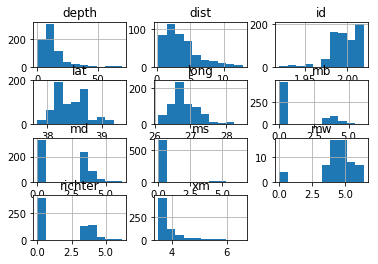

In [12]:
#dataset histogram review
dataframe_izmir.hist()

In [13]:
#Correlation
dataframe_izmir.corr()

,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
id,1.000000,-0.225689,-0.138901,0.252510,-0.140203,-0.380226,-0.093885,-0.021309,-0.575262,-0.495194,-0.600395
lat,-0.225689,1.000000,-0.189545,-0.170938,-0.017174,-0.043524,0.002319,-0.080427,-0.143028,0.032519,0.140267
long,-0.138901,-0.189545,1.000000,-0.432855,0.046468,0.033269,0.051360,-0.032343,0.148454,0.082092,0.056193
dist,0.252510,-0.170938,-0.432855,1.000000,0.036485,0.063039,-0.071557,0.164111,0.167940,-0.056073,-0.091906
depth,-0.140203,-0.017174,0.046468,0.036485,1.000000,0.293376,0.121504,0.233272,0.183508,0.387062,0.134161
xm,-0.380226,-0.043524,0.033269,0.063039,0.293376,1.000000,0.097287,0.535303,0.771358,0.660868,0.419266
md,-0.093885,0.002319,0.051360,-0.071557,0.121504,0.097287,1.000000,-0.447105,0.616977,0.275106,-0.360109
richter,-0.021309,-0.080427,-0.032343,0.164111,0.233272,0.535303,-0.447105,1.000000,0.445771,0.337480,0.279420
mw,-0.575262,-0.143028,0.148454,0.167940,0.183508,0.771358,0.616977,0.445771,1.000000,0.567910,0.555805
ms,-0.495194,0.032519,0.082092,-0.056073,0.387062,0.660868,0.275106,0.337480,0.567910,1.000000,0.455476


In [14]:
#Null Values
dataframe_izmir.isnull().sum()

id             0
date           0
time           0
lat            0
long           0
country        0
city           0
area           0
direction    256
dist         256
depth          0
xm             0
md             0
richter        0
mw           640
ms             0
mb             0
dtype: int64

In [15]:
#Table of Missing Values
TableMissingValue(dataframe_izmir)

,Missing Value,% Value
id,0,0.000000
date,0,0.000000
time,0,0.000000
lat,0,0.000000
long,0,0.000000
country,0,0.000000
city,0,0.000000
area,0,0.000000
direction,256,1.066356
dist,256,1.066356


In [16]:
#Describe of Dataframe
dataframe_izmir.describe()

,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,7.000000e+02,700.000000,700.000000,444.000000,700.000000,700.000000,700.000000,700.000000,60.000000,700.000000,700.000000
mean,1.992400e+13,38.431800,26.846757,3.659459,11.554714,3.852143,2.001286,1.744571,4.363333,0.268857,1.332000
std,1.676088e+11,0.295076,0.406337,2.582451,9.579914,0.465039,1.930253,2.006317,1.389545,1.121184,1.907377
min,1.920000e+13,37.820000,26.100000,0.200000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+13,38.170000,26.590000,1.700000,5.400000,3.500000,0.000000,0.000000,3.900000,0.000000,0.000000
50%,1.990000e+13,38.400000,26.750000,3.100000,10.000000,3.700000,3.500000,0.000000,4.650000,0.000000,0.000000
75%,2.010000e+13,38.660000,27.100000,4.725000,14.000000,4.000000,3.700000,3.800000,5.050000,0.000000,3.600000
max,2.020000e+13,39.370000,28.470000,12.900000,70.000000,6.600000,6.200000,6.200000,6.400000,6.600000,6.100000


In [17]:
#Null assigned '0' value in Dataframe
dataframe_izmir[['md','xm','richter','mb']]=dataframe_izmir[['md','xm','richter','mb']].replace(0,np.NaN)

C:\Users\Alparslan\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [18]:
#A new feature created from features
tarih = pd.to_datetime(dataframe_izmir['date'])
dataframe_izmir['year'] = tarih.dt.year
dataframe_izmir['month']= tarih.dt.month
dataframe_izmir['time'] = tarih.dt.year+tarih.dt.month/100

C:\Users\Alparslan\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Alparslan\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Alparslan\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 

In [19]:
#'unknown' assigned null values at city, area and direction coloumns.
dataframe_izmir['city'] = dataframe_izmir['city'].fillna('unknown')
dataframe_izmir['area'] = dataframe_izmir['area'].fillna('unknown')
dataframe_izmir['direction'] = dataframe_izmir['direction'].fillna('unknown')

C:\Users\Alparslan\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alparslan\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Alparslan\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [20]:
#Missing values reviewed.
TableMissingValue(dataframe_izmir)

,Missing Value,% Value
id,0,0.000000
date,0,0.000000
time,0,0.000000
lat,0,0.000000
long,0,0.000000
country,0,0.000000
city,0,0.000000
area,0,0.000000
direction,0,0.000000
dist,256,1.066356


In [21]:
tr = len(dataframe_izmir) * .3
dataframe_izmir.dropna(thresh = tr, axis = 1, inplace = True)
dataframe_izmir.head()

C:\Users\Alparslan\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,ms,mb,year,month
43,1.970000e+13,1974.04.03,1974.04,38.34,27.40,turkey,izmir,visneli_kemalpasa,south_east,0.2,5.0,3.8,3.8,NaN,0.0,NaN,1974,4
59,1.990000e+13,1994.07.30,1994.07,39.12,27.18,turkey,izmir,bergama,south,0.2,5.0,3.5,3.5,NaN,0.0,NaN,1994,7
61,2.010000e+13,2014.10.21,2014.10,38.18,27.11,turkey,izmir,sasal_menderes,south,0.2,17.7,4.1,NaN,4.1,0.0,NaN,2014,10
81,1.990000e+13,1989.09.28,1989.09,38.22,27.45,turkey,izmir,duverlik_torbali,north_east,0.2,10.0,3.5,3.5,NaN,0.0,NaN,1989,9
105,2.000000e+13,1996.02.20,1996.02,38.25,27.13,turkey,izmir,menderes,south_west,0.3,31.0,4.0,4.0,NaN,0.0,NaN,1996,2


In [22]:
#Dataframe simplified.
dataframe_simple=dataframe_izmir
dataframe_simple=dataframe_simple[['date','xm','country','city','area','direction','dist','year']]
#The necessary data for earthquake measurement was received.
dataframe_Year_Intensity=dataframe_izmir[['time','xm']]

dataframe_Year_Intensity.head(5)

,time,xm
43,1974.04,3.8
59,1994.07,3.5
61,2014.10,4.1
81,1989.09,3.5
105,1996.02,4.0


In [23]:
dataframe_Year_Intensity.corr()

,time,xm
time,1.000000,-0.391589
xm,-0.391589,1.000000


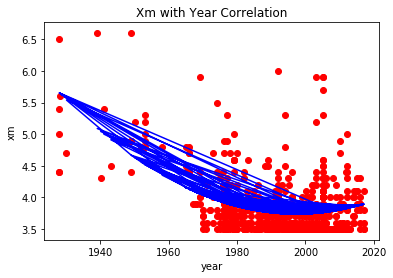

In [24]:
#Correlation was bad.
#So polynomial graphs examined.
#Correlation of XM-Year examined.
PolynomialCharts(dataframe_Year_Intensity,1920)

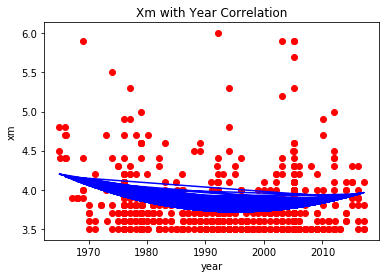

In [25]:
#1920 between 1960 datas were so less.
#So Corellation of XM-Year examined between 1960-last year
PolynomialCharts(dataframe_Year_Intensity,1960)

In [26]:
wantedYear = int(input("Enter your wanting year: "))

Enter your wanting year: 1976


In [27]:
#This predict made with datas of all years
print("Predict with all years:",Measurement_All(dataframe_Year_Intensity,wantedYear))

Predict with all years: 3.9227577028307223


In [28]:
#This predict made with datas of after 1960.
print("Predict with 1960+ years:",Measurement_After1960(dataframe_Year_Intensity,wantedYear))

Predict with 1960+ years: 3.9148284808902645


In [29]:
print("Average of two calculator",
      (
          Measurement_All(dataframe_Year_Intensity,wantedYear)
          +
          Measurement_After1960(dataframe_Year_Intensity,wantedYear)
      )
      /2
     )

Average of two calculator 3.9187930918604934


In [30]:
YearXMMean(dataframe_izmir,wantedYear)

3.883333333333333

In [31]:
#Detailed informations of earthquakes in that year
YearEarthQuakes(dataframe_izmir,int(wantedYear))

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,ms,mb,year,month
321,1.980000e+13,1976.05.15,1976.05,39.21,27.20,turkey,izmir,avunduruk_bergama,south_west,0.5,0.0,3.5,NaN,NaN,0.0,3.5,1976,5
1471,1.980000e+13,1976.09.20,1976.09,38.34,26.90,turkey,izmir,kucukkaya_guzelbahce,north_east,1.0,11.0,3.8,NaN,3.8,0.0,3.6,1976,9
3642,1.980000e+13,1976.11.24,1976.11,39.01,26.90,turkey,izmir,esentepe_dikili,south_west,1.8,0.0,3.6,NaN,NaN,0.0,3.6,1976,11
3820,1.980000e+13,1976.10.03,1976.10,38.24,26.70,turkey,izmir,demircili_urla,north_east,1.8,19.0,4.0,NaN,4.0,0.0,3.9,1976,10
5301,1.980000e+13,1976.02.11,1976.02,38.92,27.14,turkey,izmir,kiziltepe_bergama,south_east,2.4,10.0,4.2,NaN,4.2,0.0,3.6,1976,2
5665,1.980000e+13,1976.09.24,1976.09,38.40,27.20,turkey,izmir,buca,north_east,2.5,17.0,3.5,NaN,3.1,0.0,3.5,1976,9
5897,1.980000e+13,1976.05.28,1976.05,38.67,27.11,turkey,izmir,doga_menemen,north_east,2.6,4.0,3.8,NaN,3.8,0.0,NaN,1976,5
6429,1.980000e+13,1976.11.06,1976.11,38.40,26.60,turkey,izmir,balikliova_urla,south_east,2.9,14.0,3.7,NaN,3.6,0.0,3.7,1976,11
6430,1.980000e+13,1976.11.06,1976.11,38.30,26.60,turkey,izmir,barbaros_urla,south_east,2.9,0.0,3.7,NaN,3.3,0.0,3.7,1976,11
7425,1.980000e+13,1976.10.02,1976.10,38.49,27.10,turkey,izmir,cigli,south_east,3.5,11.0,4.1,NaN,4.1,0.0,3.7,1976,10


In [32]:
#Accuracy of 1960-2018's predict made with used all datas

Accuracy=0
i=0
for currentYear in range(1960,2018):
    accuracyTemp=Accuracy
    value=abs(Measurement_All(dataframe_Year_Intensity,currentYear)-YearXMMean(dataframe_izmir,currentYear))

    Accuracy+=(YearXMMean(dataframe_izmir,currentYear)-value)/YearXMMean(dataframe_izmir,currentYear)*100
    if(Accuracy>0):
        pass
        i = i+1
    else:
        Accuracy=accuracyTemp

print("Accuracy :",Accuracy/i)

Accuracy : 96.65861290058497


In [33]:
#Accuracy of all predicts made with datas used all datas between 1960-2018

Accuracy=0
i=0
for currentYear in range(1920,2018):
    accuracyTemp=Accuracy
    value=abs(Measurement_After1960(dataframe_Year_Intensity,currentYear)-YearXMMean(dataframe_izmir,currentYear))

    Accuracy+=(YearXMMean(dataframe_izmir,currentYear)-value)/YearXMMean(dataframe_izmir,currentYear)*100
    if(Accuracy>0):
        pass
        i = i+1
    else:
        Accuracy=accuracyTemp

print("Accuracy :",Accuracy/i)

Accuracy : 95.20355018081369


In [34]:
#Accuracy of all predicts made with datas used all datas
Accuracy=0
i=0
for currentYear in range(1920,2018):
    accuracyTemp=Accuracy
    value=abs(Measurement_All(dataframe_Year_Intensity,currentYear)-YearXMMean(dataframe_izmir,currentYear))

    Accuracy+=(YearXMMean(dataframe_izmir,currentYear)-value)/YearXMMean(dataframe_izmir,currentYear)*100
    if(Accuracy>0):
        pass
        i=i+1
    else:
        Accuracy=accuracyTemp


print("Accuracy :",Accuracy/i)

Accuracy : 95.31235845785088


In [35]:
#Accuracy of 1960-2018's predict made with used all datas between 1960-2018

Accuracy=0
i=0
for currentYear in range(1960,2018):
    accuracyTemp=Accuracy
    value=abs(Measurement_After1960(dataframe_Year_Intensity,currentYear)-YearXMMean(dataframe_izmir,currentYear))

    Accuracy+=(YearXMMean(dataframe_izmir,currentYear)-value)/YearXMMean(dataframe_izmir,currentYear)*100
    if(Accuracy>0):
        pass
        i = i+1
    else:
        Accuracy=accuracyTemp

print("Accuracy :",Accuracy/i)

Accuracy : 96.7207959456215
